In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflowjs as tfjs
%matplotlib inline

In [7]:
batch_size = 32
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

In [8]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
print('xTrain shape: ' + str(xTrain.shape))
print('Number of training samples: '+ str(xTrain.shape[0]))
print('The dimentions of each training input is 28 by 28')

xTrain shape: (60000, 28, 28)
Number of training samples: 60000
The dimentions of each training input is 28 by 28


In [9]:
xTrain = xTrain.reshape(xTrain.shape[0], img_rows, img_cols, 1)
xTest = xTest.reshape(xTest.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain /= 255
xTest /= 255
print('x_train shape:', xTrain.shape)
print(xTrain.shape[0], 'train samples')
print(xTest.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
yTrain = keras.utils.to_categorical(yTrain, num_classes)
yTest = keras.utils.to_categorical(yTest, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
history = model.fit(xTrain, yTrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xTest, yTest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1927 - acc: 0.9399 - val_loss: 0.0498 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0747 - acc: 0.9782 - val_loss: 0.0392 - val_acc: 0.9872
Epoch 3/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0599 - acc: 0.9829 - val_loss: 0.0362 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0531 - acc: 0.9847 - val_loss: 0.0329 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0504 - acc: 0.9852 - val_loss: 0.0307 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0474 - acc: 0.9860 - val_loss: 0.0317 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0452 - acc: 0.9876 - val_loss: 0.0323 - 

In [14]:
print(history.history.keys())
tfjs.converters.save_keras_model(model, './keras_model')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


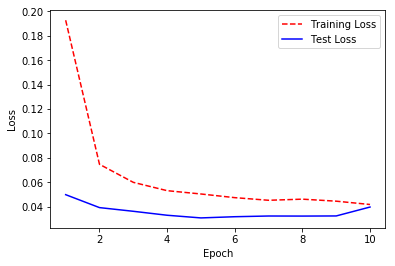

In [15]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
score = model.evaluate(xTest, yTest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.039661247421724694
Test accuracy: 0.9898
